In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [125]:
upstream =  pd.read_excel('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx', sheet_name='LCA', decimal=',')
upstream

,Properties,Parameter,Ref,Unnamed: 3,Unnamed: 4,Unnamed: 5,SMR process @ HHV,Units,Grey,blue w/o flue gas capture,blue w/ flue gas cpature,same @ LHV,Grey.1,blue w/o flue gas capture.1,blue w/ flue gas cpature.1
0,CH4 LHV [KWh/kg],13.100000,NaN,1 MJ,3.6,kWh,CH4 consumed,g CH4/MJ,14.000000,14.000000,14.000000,NaN,NaN,14.000000,14.000000
1,H2 LHV [KWh/kg],33.330000,NaN,NaN,75,g CO2/MJ,CO2 produced,g CO2/MJ,37.270289,37.270289,37.270289,NaN,45.426989,45.426989,45.426989
2,GWP20 [Years],86.000000,NaN,NaN,270,g CO2/kWh,Fugitive CH4 emissions,g CH4/MJ,0.490000,0.490000,0.490000,NaN,0.490000,0.490000,0.490000
3,GWP100 [Years],30.000000,Bauer,NaN,8999.1,g CO2/kg,Fugitive CH4 emissions,g CO2 eq/MJ,42.140000,42.140000,42.140000,NaN,42.140000,42.140000,42.140000
4,Emission intensity CH4 [g CO2/MJ],56.000000,NaN,NaN,NaN,NaN,Direct CO2 emissions,g CO2/MJ,38.500000,5.775000,5.775000,NaN,41.941879,6.291282,6.291282
5,HHV H2 [MJ/mole],0.286000,NaN,45,NaN,NaN,Capture rate,%,0.000000,0.850000,0.850000,NaN,0.000000,0.850000,0.850000
6,LHV H2 [MJ/mole],0.242202,NaN,NaN,NaN,NaN,Energy to drive SMR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,HHV H2 [mole/MJ],3.496503,NaN,NaN,NaN,NaN,CH4 consumed,g CH4/MJ,11.600000,11.600000,11.600000,NaN,11.600000,11.600000,11.600000
8,HHV [CO2/MJ_H2],0.874126,NaN,NaN,NaN,NaN,CO2 produced,g CO2/MJ,31.800000,31.800000,31.800000,NaN,31.800000,31.800000,31.800000
9,HHV H2 [MJ/kg],141.700000,NaN,NaN,NaN,NaN,Fugitive CH4 emissions,g CH4/MJ,0.410000,0.410000,0.410000,NaN,0.410000,0.410000,0.410000


# Definition of variables


In [126]:
# LHV H2 in moles per MJ
LHV_H2_moles_MJ = float(upstream[upstream.Properties == 'LHV H2 [mole/MJ]']['Parameter'].values)
LHV_H2_moles_MJ

4.128787878787879

In [127]:
# CO2 produced during SMR @ 1 mole CO2 per 4 moles H2 [moles CO2/MJ]
CO2_SMR_mole = LHV_H2_moles_MJ * 1/4
CO2_SMR_mole

1.0321969696969697

In [128]:
# Molecular weight of CO2 [g/Mole]
CO2_g_mole = float(upstream[upstream.Properties == 'CO2 [g/Mole]']['Parameter'].values)
CO2_g_mole

44.01

In [129]:
# Capture rate syngas [%] low
capture_rate_low = float(upstream[upstream.Properties == 'Capture rate [%] low']['Parameter'].values)
capture_rate_low

0.55

In [130]:
# Capture rate syngas [%] mid
capture_rate_mid = float(upstream[upstream.Properties == 'Capture rate [%] mid']['Parameter'].values)
capture_rate_mid

0.8

In [131]:
# Capture rate syngas [%] high
capture_rate_high = float(upstream[upstream.Properties == 'Capture rate [%] high']['Parameter'].values)
capture_rate_high

0.95

In [58]:
# Molecular weight of CH4 [g/Mole]
CH4_g_mole = float(upstream[upstream.Properties == 'CH4 [g/Mole]']['Parameter'].values)
CH4_g_mole

16.04

In [59]:
# Heat consumption to drive SMR in [MJ/mole_H2]
Drive_Energy_MJ_mole_h2 = float(upstream[upstream.Properties == 'Heat Input [MJ/mole_H2]']['Parameter'].values)
Drive_Energy_MJ_mole_h2

0.1814

In [60]:
# Emission intensity of CH4 [g CO2/MJ]
emission_intensity_CH4 = float(upstream[upstream.Properties == 'Emission intensity CH4  [g CO2/MJ]']['Parameter'].values)
emission_intensity_CH4

56.0

In [61]:
# Flue gas capture rate [%]
capture_rate_flue_gas = float(upstream[upstream.Properties == 'Capture rate [%] flue gas']['Parameter'].values)
capture_rate_flue_gas

0.65

In [62]:
#GWP20 of methane
GWP20_CH4 = float(upstream[upstream.Properties == 'GWP20 [Years]']['Parameter'].values)
GWP20_CH4

86.0

In [63]:
#GWP100 of methane
GWP100_CH4 = float(upstream[upstream.Properties == 'GWP100 [Years]']['Parameter'].values)
GWP100_CH4

30.0

In [66]:
# Methane leakage rate in %
leakage_rate_mid = float(upstream[upstream.Properties == 'Upstream methane leakage rate [%] mid']['Parameter'].values)
leakage_rate_mid

0.015

In [67]:
# Methane leakage rate in %
leakage_rate_high = float(upstream[upstream.Properties == 'Upstream methane leakage rate [%] high']['Parameter'].values)
leakage_rate_high

0.08

# Direct emissions from SMR

In [36]:
# CO2 emissions from SMR process [g CO2/MJ]
Direct_emissions_grey = CO2_g_mole * CO2_SMR_mole
Direct_emissions_grey

45.42698863636364

In [12]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_low = Direct_emissions_grey * (1-capture_rate_low)
Direct_emissions_low

20.442144886363636

In [13]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_mid = Direct_emissions_grey * (1-capture_rate_mid)
Direct_emissions_mid

6.814048295454547

In [14]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_high = Direct_emissions_grey * (1-capture_rate_high)
Direct_emissions_high

2.271349431818184

In [16]:
#CH4 consumed during SMR @ 1 mole CH4 per 4 moles H2 [g CH4/MJ]
CH4_SMR_grams = 1.03 * CH4_g_mole
CH4_SMR_grams


16.5212

# Emissions from energy to drive SMR

In [37]:
# When burning natural gas for heat production CO2 is emitted [CO2/mole_H2]
Drive_CO2_emissions_mole = Drive_Energy_MJ_mole_h2 * emission_intensity_CH4
Drive_CO2_emissions_mole

10.1584

In [27]:
# CO2 emissions per MJ hydrogen in order to create heat and pressure [g CO2/MJ_H2]
Drive_CO2_emissions_grams_grey = Drive_CO2_emissions_mole * LHV_H2_moles_MJ
Drive_CO2_emissions_grams_grey

41.94187878787879

In [29]:
# CO2 emissions drive with flue gas capture [g CO2/MJ]
Drive_CO2_emissions_grams_blue = Drive_CO2_emissions_grams_grey * capture_rate_flue_gas
Drive_CO2_emissions_grams_blue

27.262221212121215

In [31]:
# CH4 consumed to drive the process [g CH4/MJ_H2]
Drive_CH4_consumed = Drive_CO2_emissions_grams_blue * 1/CO2_g_mole * CH4_g_mole
Drive_CH4_consumed

9.936060628094168

# Total direct CO2 emissions

## Without flue gas capture

In [34]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_grey = Direct_emissions_grey + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_grey

87.36886742424244

In [39]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_no_fluegas = Direct_emissions_low + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_low_no_fluegas

62.38402367424243

In [40]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_no_fluegas = Direct_emissions_mid + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_mid_no_fluegas

48.75592708333334

In [41]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_no_fluegas = Direct_emissions_high + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_high_no_fluegas

44.21322821969698

## With flue gas capture

In [44]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_with_fluegas = Direct_emissions_low + Drive_CO2_emissions_grams_blue
Total_CO2_emissions_blue_low_with_fluegas

47.704366098484854

In [45]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_with_fluegas = Direct_emissions_mid + Drive_CO2_emissions_grams_blue
Total_CO2_emissions_blue_mid_with_fluegas

34.07626950757576

In [46]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_with_fluegas = Direct_emissions_high + Drive_CO2_emissions_grams_blue
Total_CO2_emissions_blue_high_with_fluegas

29.5335706439394

## Indirect emissions from natural gas transport and storage

In [311]:
# Indirect emissions from natural gas transport and storage [g CO2/MJ_H2]
Indirect_emissions = Total_CO2_emissions_grey * 0.075
Indirect_emissions

6.552665056818182

In [312]:
# Total CO2 emissions including indirect emissions from natural gas transport and storage
Total_CO2_emissions = Total_CO2_emissions_grey + Indirect_emissions
Total_CO2_emissions

93.92153248106062

# CH4 upstream emissions

In [313]:
# CH4 consumption as feedstock and energy to drive SMR [g CH4/MJ_H2]
Total_methane_SMR = CH4_SMR_grams + Drive_CH4_consumed
Total_methane_SMR

26.45726062809417

In [314]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_low = leakage_rate_low * Total_methane_SMR
upstream_emissions_CH4_low

0.05291452125618834

In [315]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_mid = leakage_rate_mid * Total_methane_SMR
upstream_emissions_CH4_mid

0.3968589094214125

In [316]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_high = leakage_rate_high * Total_methane_SMR
upstream_emissions_CH4_high

2.1165808502475336

In [317]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_low = upstream_emissions_CH4_low * GWP20_CH4
upstream_emissions_GWP20_low


4.550648828032197

In [318]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_mid = upstream_emissions_CH4_mid * GWP20_CH4
upstream_emissions_GWP20_mid

34.129866210241474

In [319]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_high = upstream_emissions_CH4_high * GWP20_CH4
upstream_emissions_GWP20_high

182.0259531212879

In [320]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_low = upstream_emissions_CH4_low * GWP100_CH4
upstream_emissions_GWP100_low

1.5874356376856502

In [321]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_mid = upstream_emissions_CH4_mid * GWP100_CH4
upstream_emissions_GWP100_mid

11.905767282642374

In [322]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_high = upstream_emissions_CH4_high * GWP100_CH4
upstream_emissions_GWP100_high

63.49742550742601

# Total emissions

## @ GWP20

In [323]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_low = Total_CO2_emissions + upstream_emissions_GWP20_low
Total_emissions_grey_GWP20_low

98.47218130909282

In [324]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_mid = Total_CO2_emissions + upstream_emissions_GWP20_mid
Total_emissions_grey_GWP20_mid


128.0513986913021

In [325]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_high = Total_CO2_emissions + upstream_emissions_GWP20_high
Total_emissions_grey_GWP20_high

275.94748560234854

## @ GWP100

In [326]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_low = Total_CO2_emissions + upstream_emissions_GWP100_low
Total_emissions_grey_GWP100_low

95.50896811874627

In [327]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_mid = Total_CO2_emissions + upstream_emissions_GWP100_mid
Total_emissions_grey_GWP100_mid

105.827299763703

In [328]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_high = Total_CO2_emissions + upstream_emissions_GWP100_high
Total_emissions_grey_GWP100_high

157.41895798848662

# Energy to power carbon capture

In [329]:
xx none according to Bauer et al.


SyntaxError: invalid syntax (591946292.py, line 1)

# Plot production emissions

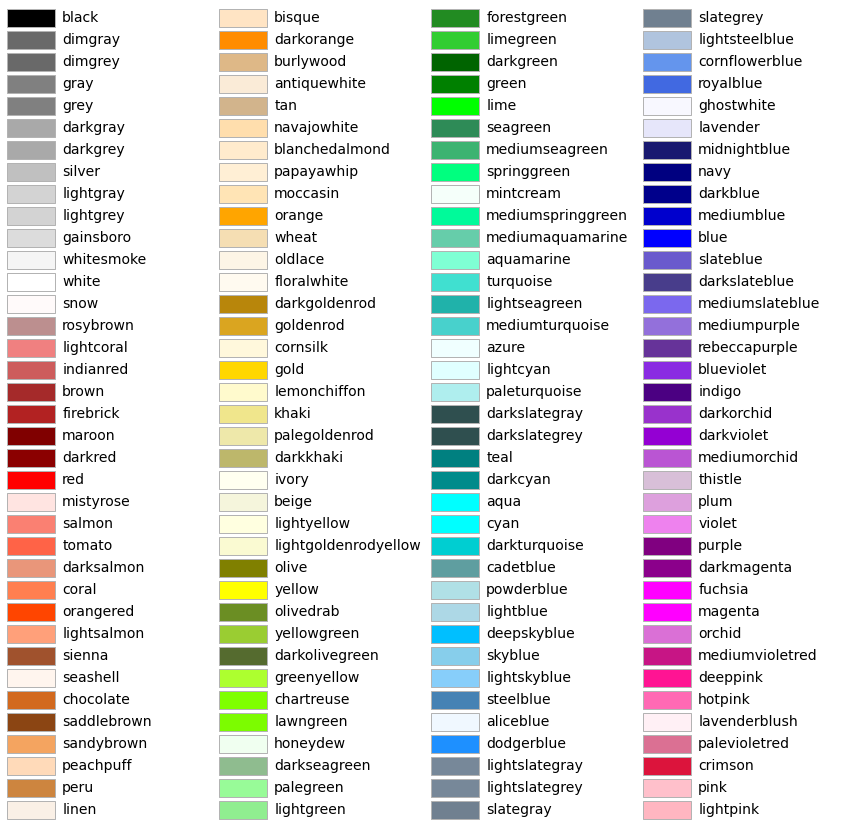

In [453]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [352]:
x =['Grey, 0.2% \nGWP100', 'Grey, 0.2% \nGWP20', 'Blue, 0.2%\nGWP100 CCS-low 55%', 'Blue, 0.2%\nGWP20 CCS-low 55%','Blue, 0.2%\nGWP100 CCS-mid 80%', 'Blue, 0.2%\nGWP20 CCS-mid 80%','Blue, 0.2%\nGWP100, CCS-high 95%','Blue, 0.2%\nGWP20, CCS-high 95%',]

In [353]:
Direct_emissions = [Direct_emissions_grey, Direct_emissions_grey, Direct_emissions_low, Direct_emissions_low, Direct_emissions_mid, Direct_emissions_mid, Direct_emissions_high, Direct_emissions_high]
Drive_emissions_plt = [Drive_CO2_emissions_grams_grey] * 8
Indirect_emissions_plt = [Indirect_emissions] * 8
Upstream_emissions = [upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low]

Text(0, 0.5, 'kg CO2/kg H2')

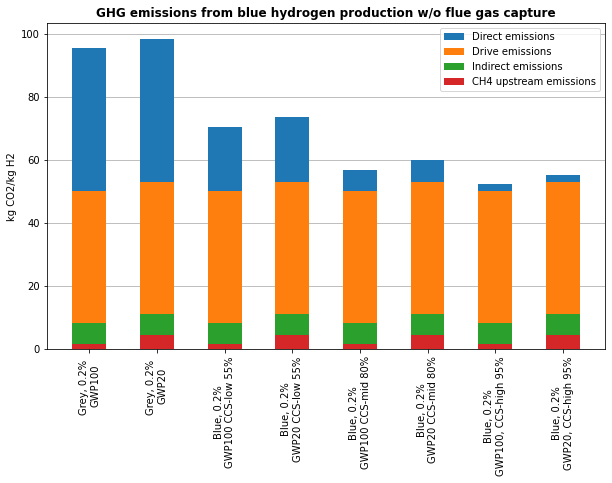

In [465]:
# Creating a stacked bar chart to display emissions. Adding lists for the bottom method.
fig, ax = plt.subplots(figsize=(10,6))

width = 0.5
#y_axis = np.arange(101,step=10)
direct = plt.bar(x, Direct_emissions, width, label='Direct emissions', bottom=list(map(lambda x, y, z: x + y + z, Upstream_emissions, Indirect_emissions_plt, Drive_emissions_plt)))
drive = plt.bar(x, Drive_emissions, width, label='Drive emissions', bottom=list(map(lambda x, y: x + y, Upstream_emissions, Indirect_emissions_plt)))
indirect = plt.bar(x, Indirect_emissions, width, label = 'Indirect emissions', bottom=Upstream_emissions)
upstream = plt.bar(x, Upstream_emissions, width, label = 'CH4 upstream emissions')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
#ax.twinx()
plt.xticks(rotation = 90)
#plt.yticks(y_axis)
#plt.ylim(0,90)
plt.legend(loc='upper right')
plt.title('GHG emissions from blue hydrogen production w/o flue gas capture', fontweight = 'bold')
plt.ylabel('g CO2eq/MJ H2')
ax.set_ylabel('kg CO2/kg H2')

Text(0.5, 0, 'g CO2eq/MJ H2')

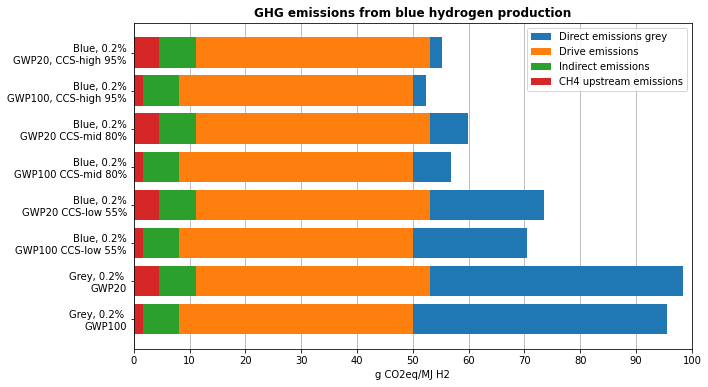

In [461]:
''# horizontal
fig, ax = plt.subplots(figsize=(10,6))
x_axis = np.arange(101,step=10)
direct = plt.barh(x, Direct_emissions, label='Direct emissions grey', left=list(map(lambda x, y, z: x + y + z, Upstream_emissions, Indirect_emissions_plt, Drive_emissions_plt)))
drive = plt.barh(x, Drive_emissions, label='Drive emissions', left=list(map(lambda x, y: x + y, Upstream_emissions, Indirect_emissions_plt)))
indirect = plt.barh(x, Indirect_emissions, label = 'Indirect emissions', left=Upstream_emissions)
upstream = plt.barh(x, Upstream_emissions, label = 'CH4 upstream emissions')
plt.grid(True, axis = 'x')
ax.set_axisbelow(True)
plt.xticks(x_axis)
plt.xlim(0,100)
plt.legend(loc='upper right')
plt.title('GHG emissions from blue hydrogen production', fontweight = 'bold')
plt.xlabel('g CO2eq/MJ H2')

Text(0, 0.5, '[g CO2eq/MJ_H2]')

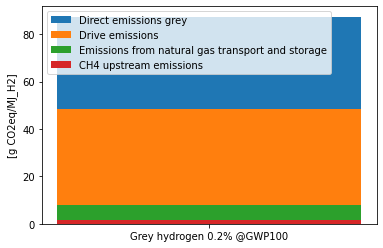

In [187]:
grey_low_GWP100 = 'Grey hydrogen 0.2% @GWP100'
plt.bar(grey_low_GWP100, Direct_emissions_grey, width= 2, label='Direct emissions grey', bottom=Drive_CO2_emissions_grams_grey)
plt.bar(grey_low_GWP100, Drive_CO2_emissions_grams_grey, width= 2, label='Drive emissions', bottom=Indirect_emissions)
plt.bar(grey_low_GWP100, Indirect_emissions, width= 2, label = 'Emissions from natural gas transport and storage', bottom=upstream_emissions_GWP100_low)
plt.bar(grey_low_GWP100, upstream_emissions_GWP100_low, width = 2, label = 'CH4 upstream emissions')
plt.legend(loc='upper left')
plt.ylabel('[g CO2eq/MJ_H2]')

Text(0, 0.5, '[g CO2eq/MJ_H2]')

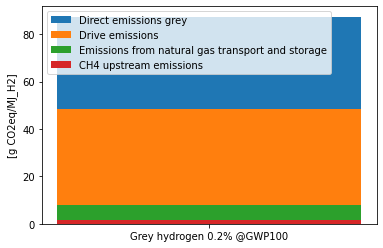

In [134]:
# Total emissions for grey hydrogen production at 0.02% upstream emissions and GWP100
grey_low_GWP100 = 'Grey hydrogen 0.2% @GWP100'
plt.bar(grey_low_GWP100, Direct_emissions_grey, width= 2, label='Direct emissions grey', bottom=Drive_CO2_emissions_grams_grey)
plt.bar(grey_low_GWP100, Drive_CO2_emissions_grams_grey, width= 2, label='Drive emissions', bottom=Indirect_emissions)
plt.bar(grey_low_GWP100, Indirect_emissions, width= 2, label = 'Emissions from natural gas transport and storage', bottom=upstream_emissions_GWP100_low)
plt.bar(grey_low_GWP100, upstream_emissions_GWP100_low, width = 2, label = 'CH4 upstream emissions')
plt.legend(loc='upper left')
plt.ylabel('[g CO2eq/MJ_H2]')

Text(0, 0.5, '[g CO2eq/kg_H2]')

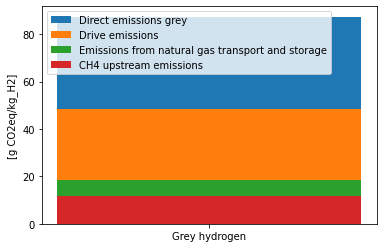

In [119]:
# Total emissions for grey hydrogen production at 1.5% upstream emissions and GWP100
grey = 'Grey hydrogen'
plt.bar(grey, Direct_emissions_grey, width= 2, label='Direct emissions grey', bottom=Drive_CO2_emissions_grams_grey)
plt.bar(grey, Drive_CO2_emissions_grams_grey, width= 2, label='Drive emissions', bottom=Indirect_emissions)
plt.bar(grey, Indirect_emissions, width= 2, label = 'Emissions from natural gas transport and storage', bottom=upstream_emissions_GWP100_mid)
plt.bar(grey, upstream_emissions_GWP100_mid, width = 2, label = 'CH4 upstream emissions')
plt.legend(loc='upper left')
plt.ylabel('[g CO2eq/MJ_H2]')
